In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from collections import Counter

In [2]:
df_cust= pd.read_csv("Customers.csv")
df_prod= pd.read_csv("Products.csv")
df_trans= pd.read_csv("Transactions.csv")

In [3]:
df_cust.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [4]:
df_prod.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [5]:
df_trans.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [16]:
customers_info = {
    "Missing Values": df_cust.isnull().sum(),
    "Duplicates": df_cust.duplicated().sum(),
    "Shape": df_cust.shape,
}

products_info = {
    "Missing Values": df_prod.isnull().sum(),
    "Duplicates": df_prod.duplicated().sum(),
    "Shape": df_prod.shape,
}

transactions_info = {
    "Missing Values": df_trans.isnull().sum(),
    "Duplicates": df_trans.duplicated().sum(),
    "Shape": df_trans.shape,
}

In [17]:
customers_info

{'Missing Values': CustomerID      0
 CustomerName    0
 Region          0
 SignupDate      0
 dtype: int64,
 'Duplicates': 0,
 'Shape': (200, 4)}

In [18]:
products_info

{'Missing Values': ProductID      0
 ProductName    0
 Category       0
 Price          0
 dtype: int64,
 'Duplicates': 0,
 'Shape': (100, 4)}

In [19]:
transactions_info

{'Missing Values': TransactionID      0
 CustomerID         0
 ProductID          0
 TransactionDate    0
 Quantity           0
 TotalValue         0
 Price              0
 dtype: int64,
 'Duplicates': 0,
 'Shape': (1000, 7)}

In [20]:
trans_merged = df_trans.merge(df_cust, on='CustomerID', how='left')

In [22]:
trans_merged = trans_merged.merge(df_prod, on='ProductID', how='left')

In [24]:
trans_merged.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [29]:
trans_merged['TransactionDate'] = pd.to_datetime(trans_merged['TransactionDate'])

In [30]:
df_cust['SignupDate'] = pd.to_datetime(df_cust['SignupDate'])

In [33]:
trans_merged['MonthYear'] = trans_merged['TransactionDate'].dt.to_period('M')

In [35]:
trans_merged['Month'] = trans_merged['TransactionDate'].dt.month

In [36]:
trans_merged['DayOfWeek'] = trans_merged['TransactionDate'].dt.day_name()

In [37]:
trans_merged.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y,MonthYear,Month,DayOfWeek
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024-08,8,Sunday
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024-05,5,Monday
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024-04,4,Thursday
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024-03,3,Tuesday
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024-03,3,Thursday


In [39]:
monthly_sales = trans_merged.groupby('Month')['TotalValue'].sum().reset_index()

In [41]:
print(monthly_sales)

    Month  TotalValue
0       1    66376.39
1       2    51459.27
2       3    47828.73
3       4    57519.06
4       5    64527.74
5       6    48771.18
6       7    71366.39
7       8    63436.74
8       9    70603.75
9      10    47063.22
10     11    38224.37
11     12    62818.72


In [42]:
weekday_sales = trans_merged.groupby('DayOfWeek')['TotalValue'].sum().reset_index()

In [43]:
print(weekday_sales)

   DayOfWeek  TotalValue
0     Friday    87032.09
1     Monday   101984.33
2   Saturday    81399.74
3     Sunday    92605.93
4   Thursday    99202.71
5    Tuesday   108567.61
6  Wednesday   119203.15


In [45]:
product_performance = trans_merged.groupby(['ProductName', 'Price_y']).agg(
    TotalRevenue=('TotalValue', 'sum'),
    QuantitySold=('Quantity', 'sum')
).reset_index()

In [46]:
product_performance['RevenuePerUnit'] = product_performance['TotalRevenue'] / product_performance['QuantitySold']

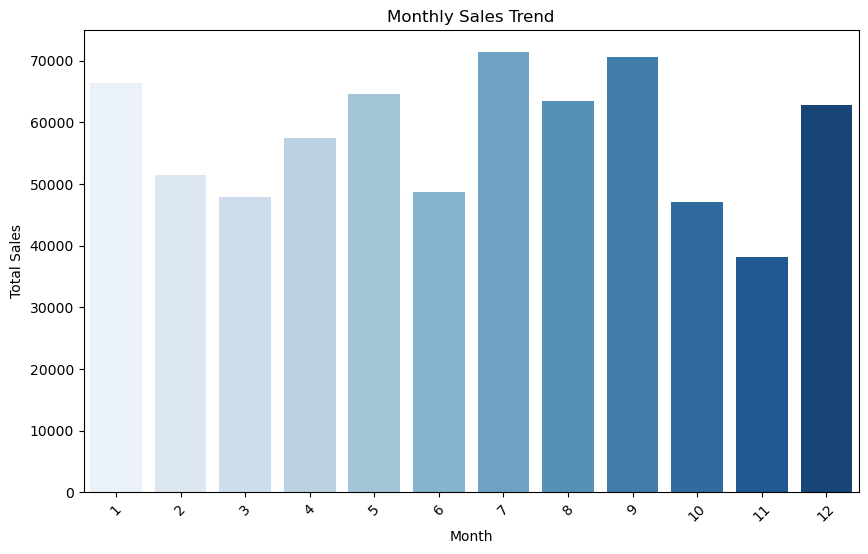

In [109]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='TotalValue', data=monthly_sales, palette='Blues')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

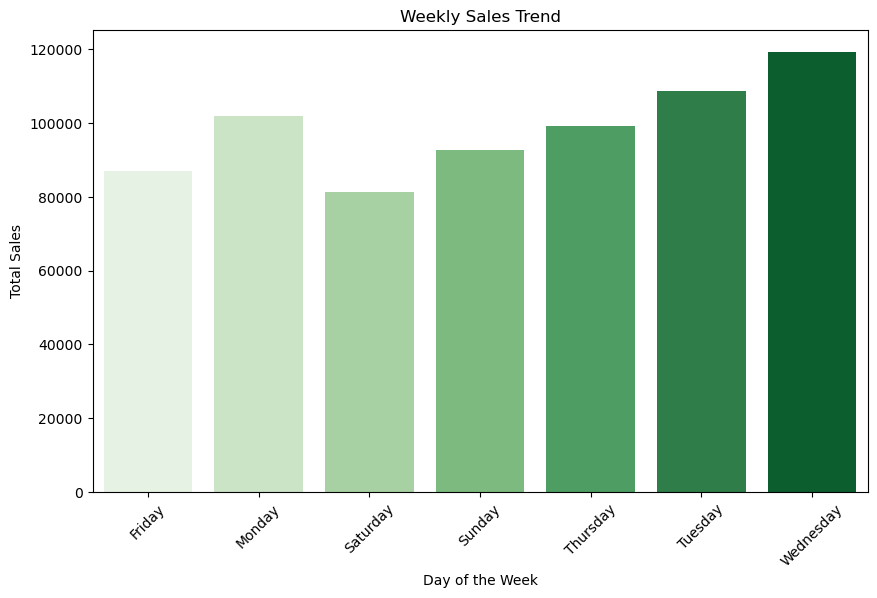

In [49]:
plt.figure(figsize=(10, 6))
sns.barplot(x='DayOfWeek', y='TotalValue', data=weekday_sales, palette='Greens')
plt.title('Weekly Sales Trend')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

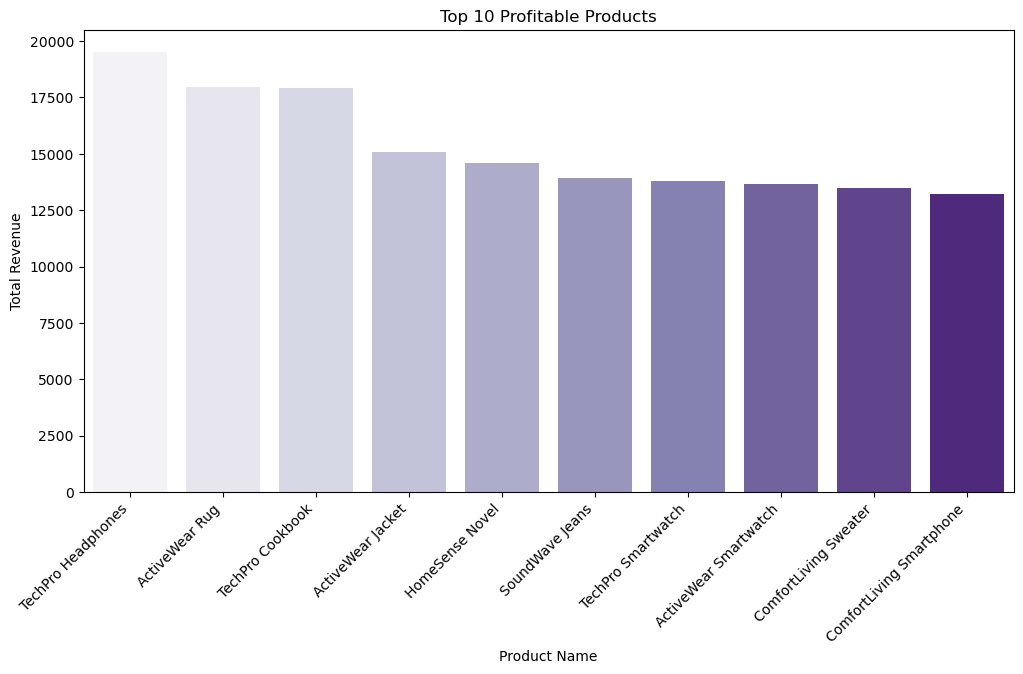

In [111]:
top_profitable_products = product_performance.sort_values(by='TotalRevenue', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='ProductName', y='TotalRevenue', data=top_profitable_products, palette='Purples')
plt.title('Top 10 Profitable Products')
plt.xlabel('Product Name')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.show()

In [58]:
region_category_sales = trans_merged.groupby(['Region', 'Category'])['TotalValue'].sum().reset_index()

In [59]:
top_categories_by_region = region_category_sales.sort_values(by=['Region', 'TotalValue'], ascending=[True, False]).groupby('Region').head(1)

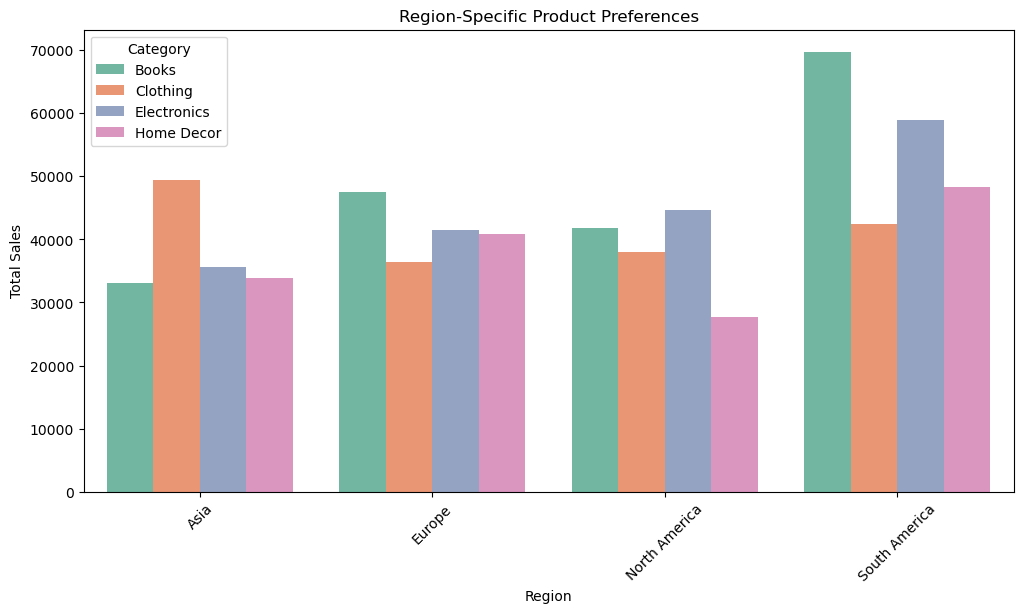

In [66]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='TotalValue', hue='Category', data=region_category_sales, palette='Set2')
plt.title('Region-Specific Product Preferences')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.show()

In [80]:
sales_trend = trans_merged.groupby('MonthYear')['TotalValue'].sum().reset_index()

In [81]:
region_sales = trans_merged.groupby('Region')['TotalValue'].sum().reset_index()

In [82]:
category_sales = trans_merged.groupby('Category')['TotalValue'].sum().reset_index()

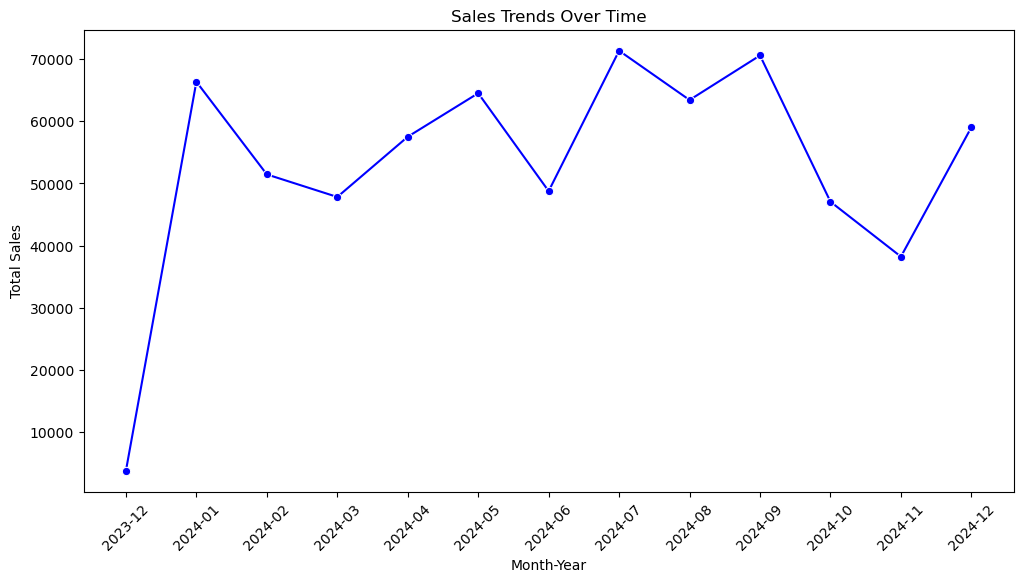

In [83]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=sales_trend['MonthYear'].astype(str), y=sales_trend['TotalValue'], marker='o', color='blue')
plt.title('Sales Trends Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

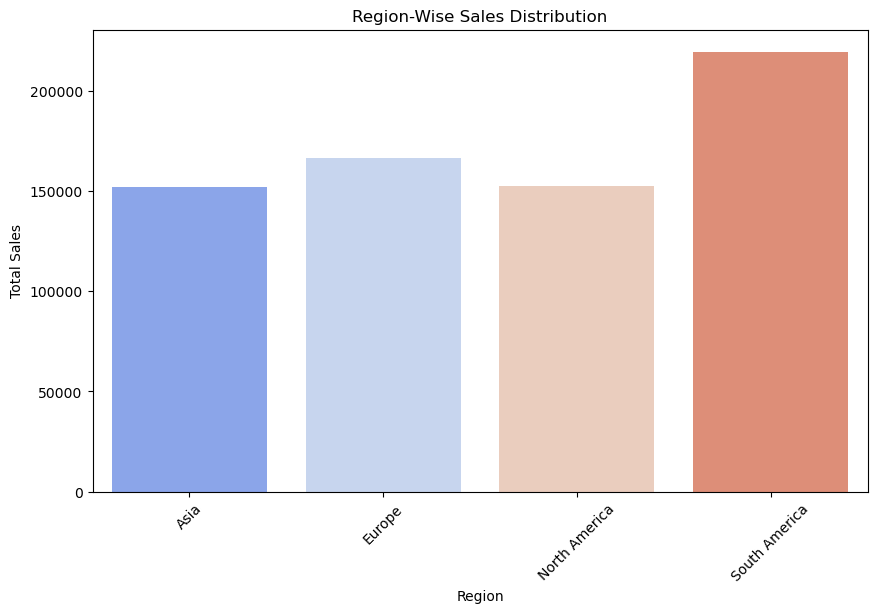

In [84]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='TotalValue', data=region_sales, palette='coolwarm')
plt.title('Region-Wise Sales Distribution')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

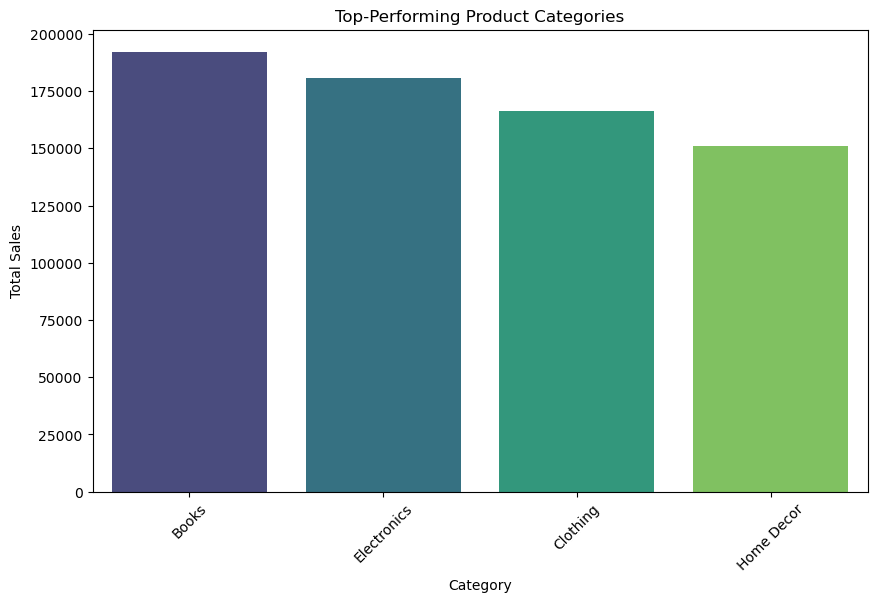

In [85]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='TotalValue', data=category_sales.sort_values(by='TotalValue', ascending=False), palette='viridis')
plt.title('Top-Performing Product Categories')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

In [86]:
top_products = trans_merged.groupby('ProductName')['Quantity'].sum().reset_index()
top_products = top_products.sort_values(by='Quantity', ascending=False).head(10)

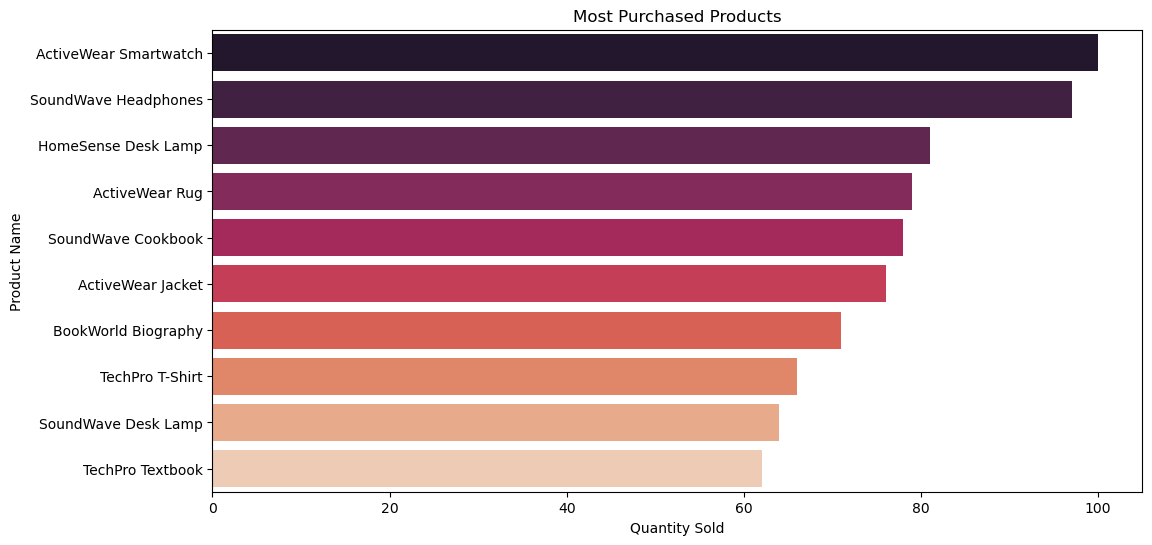

In [87]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Quantity', y='ProductName', data=top_products, palette='rocket')
plt.title('Most Purchased Products')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Name')
plt.show()

In [90]:
signup_trend = df_cust.groupby(df_cust['SignupDate'].dt.to_period('M'))['CustomerID'].count().reset_index()
signup_trend.columns = ['SignupMonth', 'NewSignups']

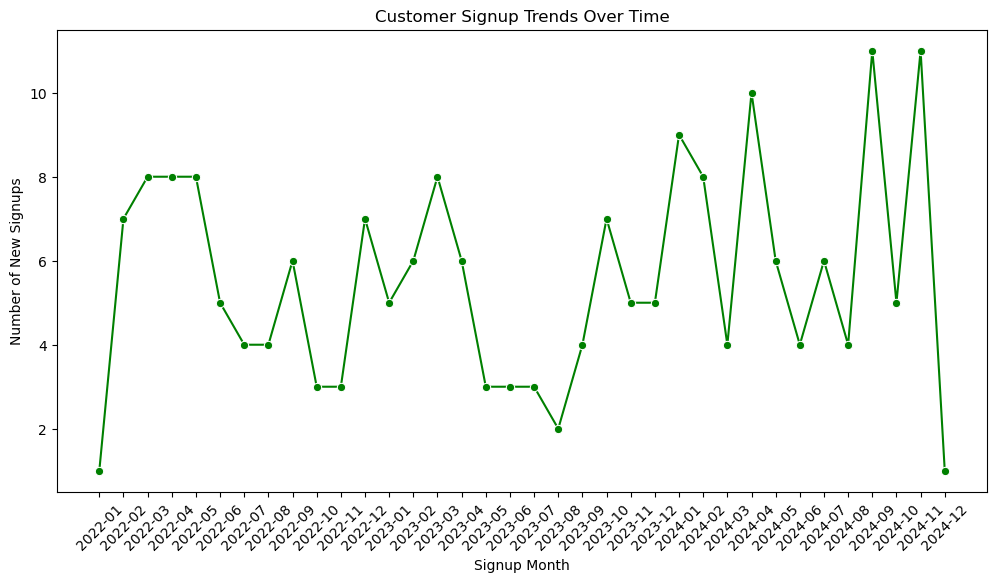

In [91]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=signup_trend['SignupMonth'].astype(str), y=signup_trend['NewSignups'], marker='o', color='green')
plt.title('Customer Signup Trends Over Time')
plt.xlabel('Signup Month')
plt.ylabel('Number of New Signups')
plt.xticks(rotation=45)
plt.show()

In [93]:
top_revenue_products = trans_merged.groupby('ProductName')['TotalValue'].sum().reset_index()
top_revenue_products = top_revenue_products.sort_values(by='TotalValue', ascending=False).head(10)


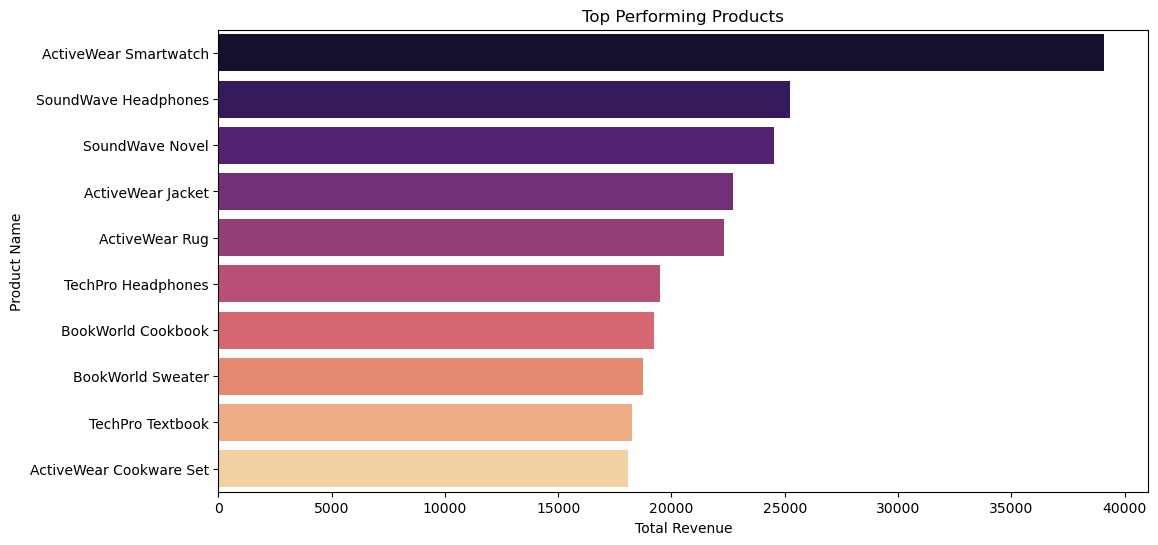

In [94]:
plt.figure(figsize=(12, 6))
sns.barplot(x='TotalValue', y='ProductName', data=top_revenue_products, palette='magma')
plt.title('Top Performing Products')
plt.xlabel('Total Revenue')
plt.ylabel('Product Name')
plt.show()

In [96]:
avg_transaction_value = trans_merged.groupby('Region')['TotalValue'].mean().reset_index()
avg_transaction_value.columns = ['Region', 'AvgTransactionValue']

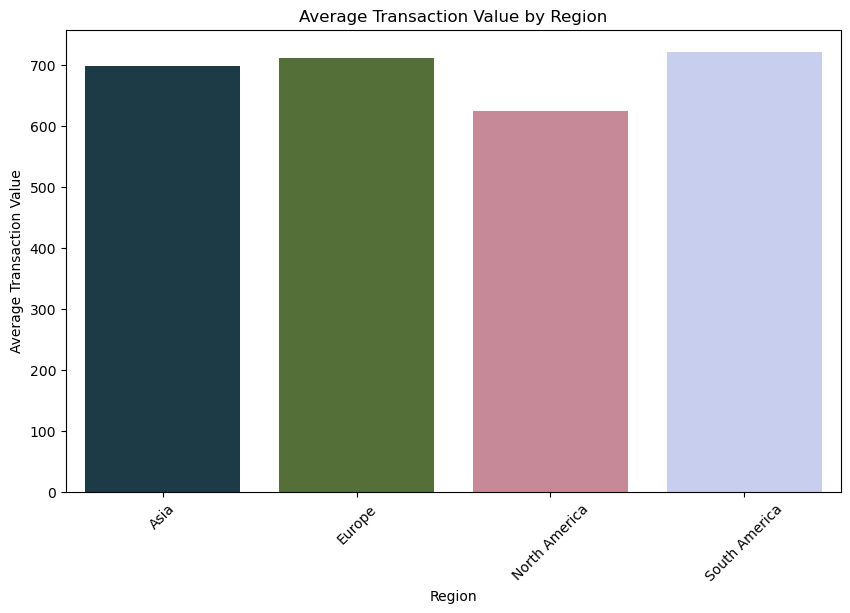

In [98]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='AvgTransactionValue', data=avg_transaction_value, palette='cubehelix')
plt.title('Average Transaction Value by Region')
plt.xlabel('Region')
plt.ylabel('Average Transaction Value')
plt.xticks(rotation=45)
plt.show()

In [101]:
customer_transactions = trans_merged.groupby('CustomerID')['TransactionID'].count().reset_index()
repeat_customers = customer_transactions[customer_transactions['TransactionID'] > 1]
retention_rate = (repeat_customers.shape[0] / df_cust.shape[0]) * 100

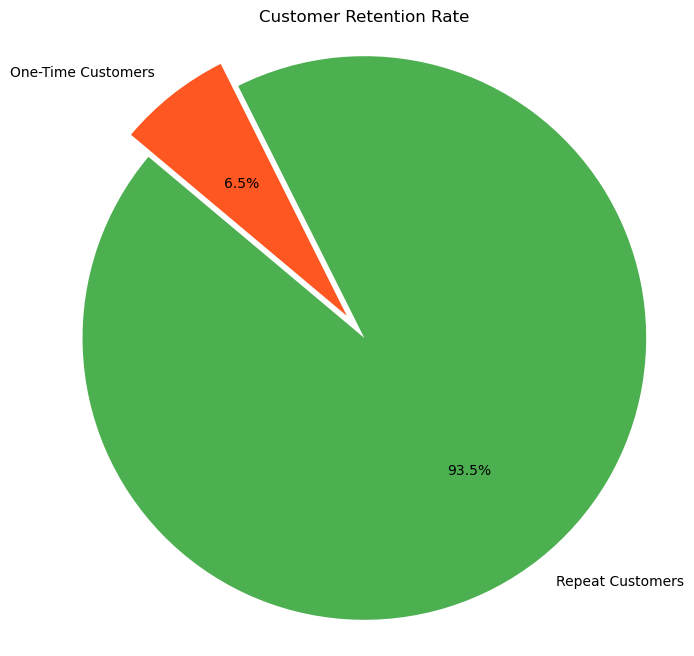

In [103]:
plt.figure(figsize=(8, 8))
labels = ['Repeat Customers', 'One-Time Customers']
sizes = [repeat_customers.shape[0], df_cust.shape[0] - repeat_customers.shape[0]]
colors = ['#4CAF50', '#FF5722']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, explode=(0.1, 0))
plt.title('Customer Retention Rate')
plt.axis('equal')
plt.show()

In [106]:
customer_ltv = trans_merged.groupby('CustomerID')['TotalValue'].sum().reset_index()
customer_ltv.columns = ['CustomerID', 'LifetimeValue']

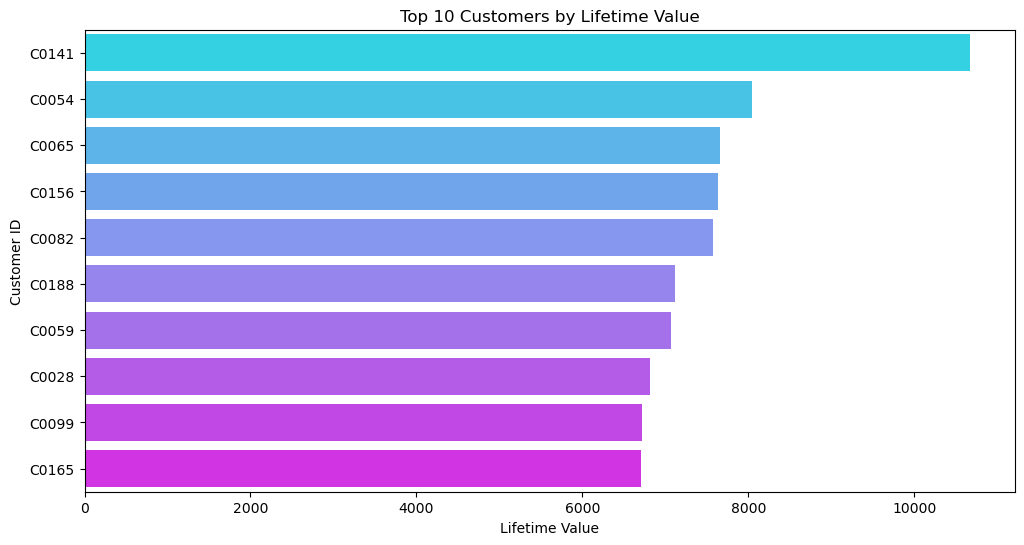

In [107]:
top_customers = customer_ltv.sort_values(by='LifetimeValue', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='LifetimeValue', y='CustomerID', data=top_customers, palette='cool')
plt.title('Top 10 Customers by Lifetime Value')
plt.xlabel('Lifetime Value')
plt.ylabel('Customer ID')
plt.show()